In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from model import load_model
from preprocess import load_train_test_split

sns.set_style('whitegrid')

2026-01-07 14:45:50.798151: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-07 14:45:50.906224: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-07 14:45:53.340632: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/marcel/workspaces/teaching/ai-projects/ai-demo-notebooks/.venv/lib/python3.12/site-pa

## Load Model and Data

In [4]:
model = load_model()
splits = load_train_test_split()

X_test = splits['X_test']
y_test = splits['y_test']

print(f"Test set: {X_test.shape[0]} samples")

Loaded train/test splits from ./data/processed/penguins_train_test.pkl
Test set: 67 samples


#### Make Predictions

In [5]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print(f"First 5 predictions:")
print(f"True:      {y_test.values[:5]}")
print(f"Predicted: {y_pred[:5]}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
First 5 predictions:
True:      [0 2 0 1 0]
Predicted: [0 2 2 1 0]


####  Evaluate model

In [6]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss:     {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

Test Loss:     0.5863
Test Accuracy: 0.8209 (82.09%)


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76        31
           1       1.00      1.00      1.00        13
           2       0.66      1.00      0.79        23

    accuracy                           0.82        67
   macro avg       0.89      0.87      0.85        67
weighted avg       0.88      0.82      0.82        67



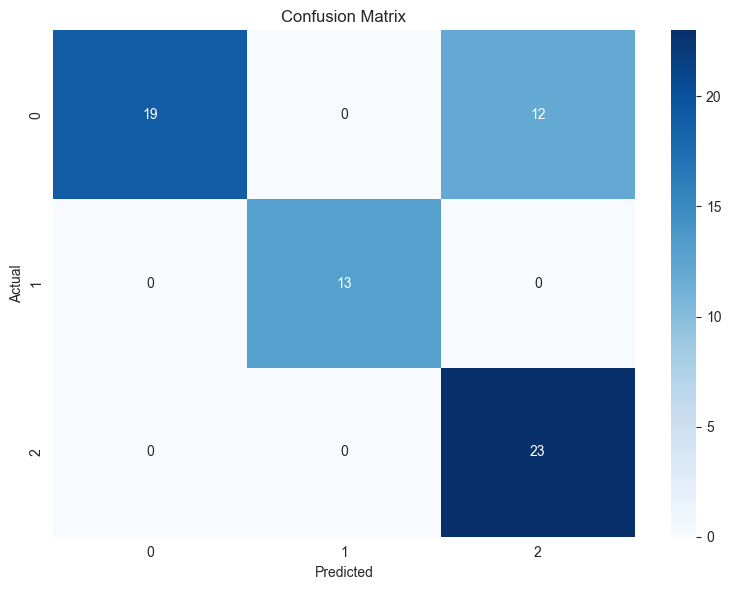

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()